# 🏥 Real-World Healthcare Project: Predicting Hospital ReadmissionThis project predicts whether a patient will be readmitted to the hospital within 30 days using classification algorithms.

**Algorithms used:** Logistic Regression, Decision Tree, Random Forest, Gradient Boosting

In [2]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Step 2: Load dataset
# Upload diabetic_data.csv using Colab file upload panel
df = pd.read_csv('/content/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6.0,25.0,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# Step 3: Check shape and missing values
print("\nFirst 5 Rows:")
print(df.head())
print(df.dtypes)


First 5 Rows:
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                6.0                      25.0                  1.0   
1                1.0                       1.0                  7.0   
2                1.0                       1.0                  7.0   
3                1.0                       1.0                  7.0   
4                1.0                       1.0                  7.0   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0               1.0  ...          No      No      

In [6]:
# Step 4: Clean data
df = df.drop(['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'], axis=1)
df = df.replace('?', np.nan)
df = df.dropna()
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [7]:
# Step 5: Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [8]:
# Step 6: Train-test split
X = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 7: Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    print(f"🔍 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred))
    print("-" * 40)

🔍 Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

AUC-ROC: nan
----------------------------------------
🔍 Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.00      0.00      0.00         0

    accuracy                           0.67         9
   macro avg       0.50      0.33      0.40         9
weighted avg       1.00      0.67      0.80         9

AUC-ROC: nan
----------------------------------------
🔍 Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1

## 📊 Step 8: Exploratory Data Analysis (EDA)

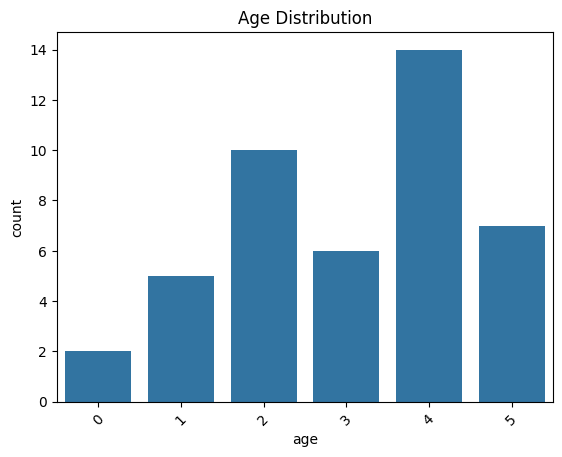

In [10]:
# Age distribution
sns.countplot(x='age', data=df)
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

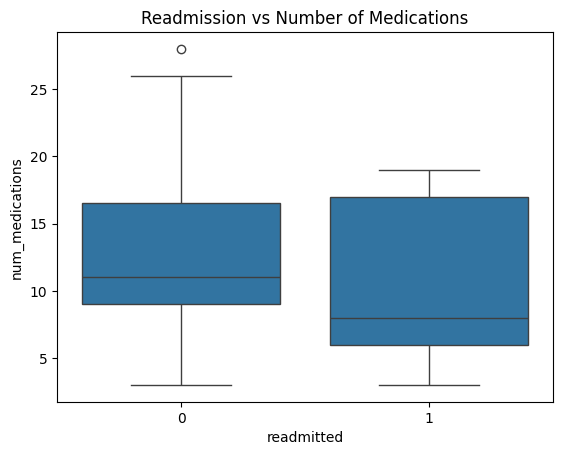

In [11]:
# Readmission by number of medications
sns.boxplot(x='readmitted', y='num_medications', data=df)
plt.title('Readmission vs Number of Medications')
plt.show()

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

## 🌟 Step 9: Feature Importance (Using Random Forest)

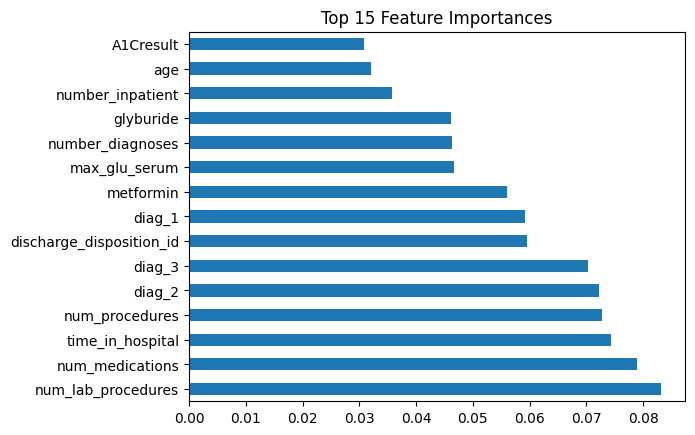

In [12]:
# Train Random Forest for feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
features = X.columns

# Plot feature importances
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Feature Importances')
plt.show()